Cross-Validation R2 Scores: [0.19492921 0.15913236 0.17991806 0.17449938 0.16748279]
Mean CV R2 Score: 0.17519235820994855, Std CV R2 Score: 0.01208070186804009
Results for Linear Regression:
{'Model': 'Linear Regression', 'Train R2': 0.1772145774578534, 'Train RMSE': 45.7288026424924, 'Train MSE': 2091.1233911160193, 'Train MAE': 35.558695270494596, 'Test R2': 0.16641609607406127, 'Test RMSE': 44.5747670305217, 'Test MSE': 1986.909855825284, 'Test MAE': 34.5754947833434}


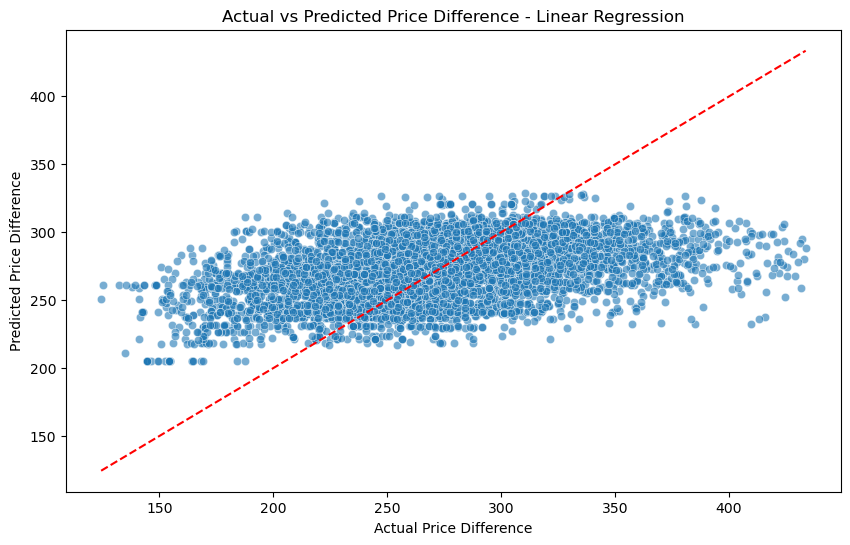

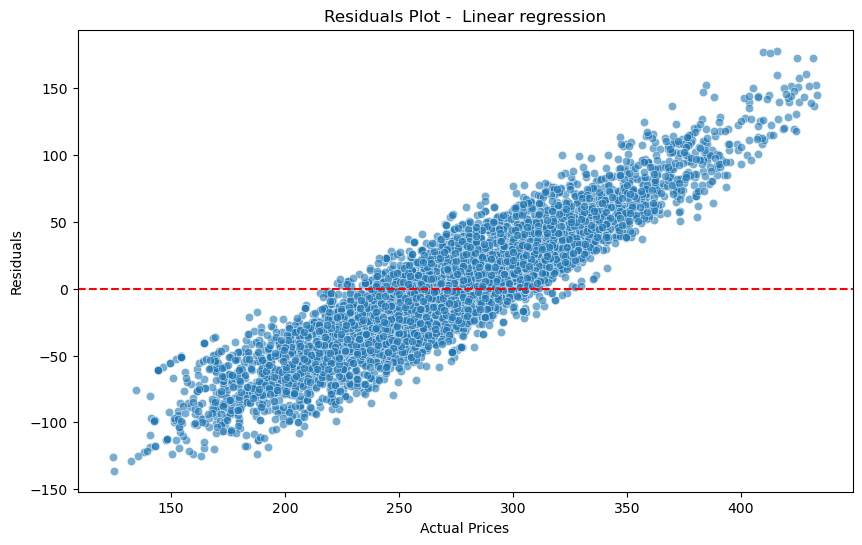

In [1]:
# linear_regression_with_cv.py
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the prepared data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV R2 Score: {cv_scores.mean()}, Std CV R2 Score: {cv_scores.std()}")

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

results = {
    'Model': 'Linear Regression',
    'Train R2': train_r2,
    'Train RMSE': train_rmse,
    'Train MSE': train_mse,
    'Train MAE': train_mae,
    'Test R2': test_r2,
    'Test RMSE': test_rmse,
    'Test MSE': test_mse,
    'Test MAE': test_mae
}

# Display results
print("Results for Linear Regression:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Price Difference')
plt.ylabel('Predicted Price Difference')
plt.title('Actual vs Predicted Price Difference - Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()




#Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot -  Linear regression')
plt.show()



## Conclusions
indicating no clear bias. However, there is a linear pattern where residuals increase as actual values increase, suggesting the model does not fit well across the entire range of values. This indicates potential issues of heteroscedasticity.






